In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [75]:
df = pd.read_csv("C:/Users/Victor/Downloads/train.csv")

In [76]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [77]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [78]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

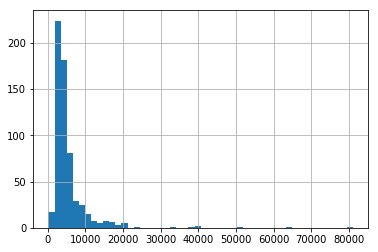

In [79]:
df['ApplicantIncome'].hist(bins=50)

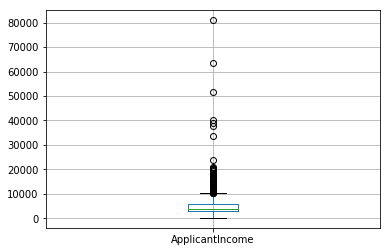

In [80]:
df.boxplot(column = 'ApplicantIncome')

C:\Users\Victor\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


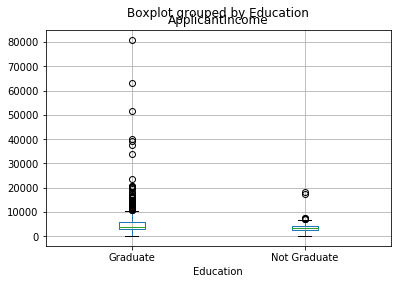

In [81]:
df.boxplot(column="ApplicantIncome",by="Education")

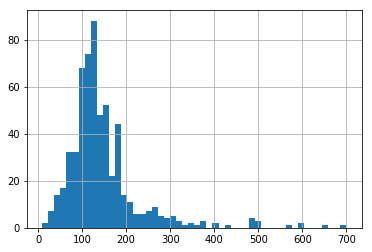

In [82]:
df['LoanAmount'].hist(bins=50)

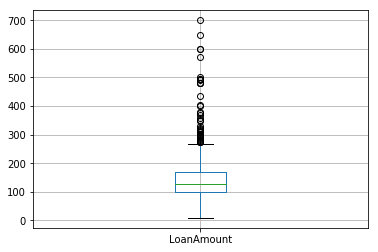

In [83]:
df.boxplot('LoanAmount')

In [84]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print('Frequency table for Credit History')
print(temp1)
print('\nProbability of getting Loan based on Credit History')
print(temp2)

Frequency table for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting Loan based on Credit History
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


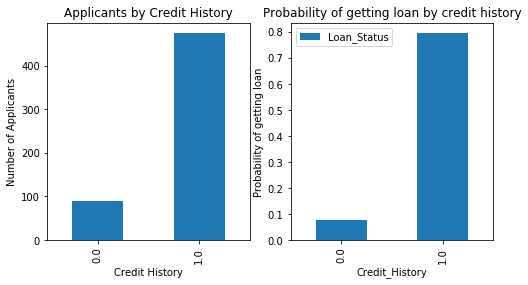

In [85]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Number of Applicants')
ax1.set_title('Applicants by Credit History')
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(ax=ax2,kind='bar')

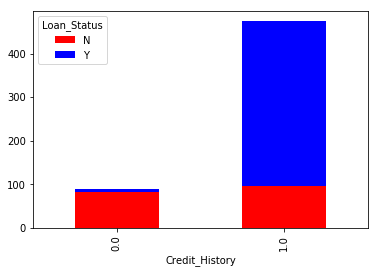

In [86]:
temp3 = pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True, color = ['red','blue'])

In [87]:
### Data Munging

df.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [89]:
df['Self_Employed'].fillna('No',inplace=True)

In [90]:
table = df.pivot_table(values="LoanAmount",index="Self_Employed",columns="Education",aggfunc=np.median)
def fage (x):
    return table.loc[x['Self_Employed'],x['Education']]
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage,axis=1),inplace=True)

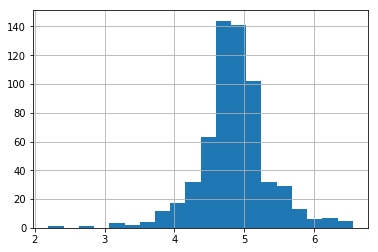

In [91]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

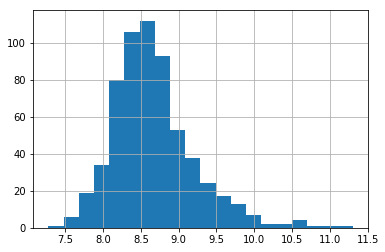

In [92]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [93]:
df.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [95]:
df['Gender'].fillna('Male',inplace=True)

In [97]:
df['Married'].fillna('Yes',inplace=True)

In [98]:
df['Dependents'].fillna('O',inplace=True)

In [101]:
df['Credit_History'].fillna('1.0',inplace=True)

In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [110]:
df.apply(lambda x: sum(x.isnull()))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [111]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


In [123]:
def classification_model(model,data,predictors,outcome):
    #fit
    model.fit(data[predictors],data[outcome])
    
    #predict
    predictions = model.predict(data[predictors])
    
    #accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    
    #k-fold CV with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
          train_predictors = (data[predictors].iloc[train,:])
          train_target = data[outcome].iloc[train]
          model.fit(train_predictors, train_target)
          error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    #fit the model again
    model.fit(data[predictors],data[outcome])


In [124]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 80.945%
Cross-Validation Score : 80.946%


In [129]:
#other combinations of variables
predictor_var=['TotalIncome_log','LoanAmount_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 68.730%
Cross-Validation Score : 68.729%


In [133]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 88.925%
Cross-Validation Score : 68.883%


In [135]:
#random forest
model = RandomForestClassifier(n_estimators = 100)
predictor_var = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','LoanAmount_log','TotalIncome_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 100.000%
Cross-Validation Score : 78.015%


In [139]:
# series with feature importances
featimp = pd.Series(model.feature_importances_,index=predictor_var).sort_values(ascending=False)
print (featimp)

TotalIncome_log     0.271825
Credit_History      0.264569
LoanAmount_log      0.223539
Dependents          0.053606
Property_Area       0.050476
Loan_Amount_Term    0.047429
Married             0.024931
Education           0.022865
Self_Employed       0.020520
Gender              0.020239
dtype: float64


In [146]:
model = RandomForestClassifier(n_estimators = 25, min_samples_split=25,max_depth = 7,max_features=1)
predictor_var = ['Dependents','Credit_History','Property_Area','LoanAmount_log','TotalIncome_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 83.062%
Cross-Validation Score : 80.457%
